# Lab 2.06 - Univariate Analysis

## Exercise 6 - Android Persistence

Import all necessary Python libraries and load the Android Persistence dataset from lab exercise 1.02.  Do not forget the conversion to categorical variables. Define an order in case of an ordinal variable.

In [1]:
# Importing the necessary packages
import numpy as np                                  # Scientific computing
import scipy.stats as stats                         # Statistical tests

import pandas as pd                                 # Data Frame
from pandas.api.types import CategoricalDtype

import matplotlib.pyplot as plt                     # Basic visualisation
from statsmodels.graphics.mosaicplot import mosaic  # Mosaic diagram
import seaborn as sns                               # Statistical visualisation

In [58]:
android_persistence = pd.read_csv('../data/android_persistence_cpu.csv', sep=';')
android_persistence.PersistenceType = android_persistence.PersistenceType.astype('category')
android_persistence.DataSize = android_persistence.DataSize.astype('category')

In [59]:
android_persistence.head()

,Time,PersistenceType,DataSize
0,1.81,Sharedpreferences,Small
1,1.35,Sharedpreferences,Small
2,1.84,Sharedpreferences,Small
3,1.54,Sharedpreferences,Small
4,1.81,Sharedpreferences,Small


In [60]:
android_persistence.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Time             300 non-null    float64 
 1   PersistenceType  300 non-null    category
 2   DataSize         300 non-null    category
dtypes: category(2), float64(1)
memory usage: 3.4 KB


Visualise the variables `DataSize` and `PersistenceType` separately using a suitable chart type.

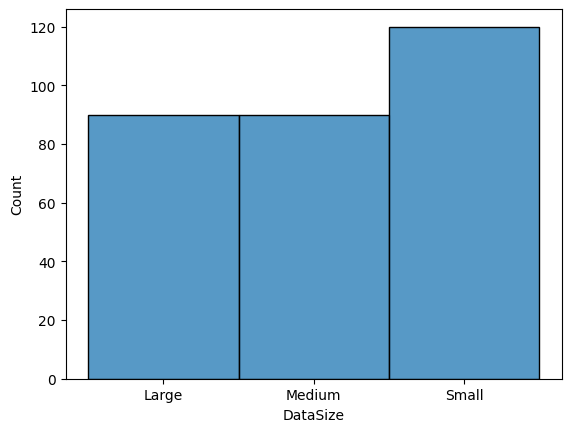

In [61]:
d = sns.histplot(data=android_persistence.DataSize)



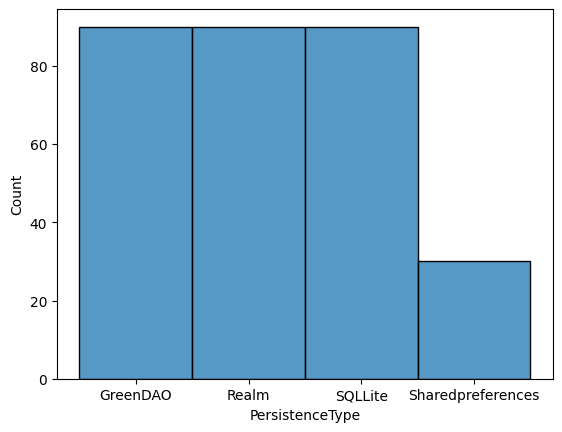

In [62]:
pt = sns.histplot(data=android_persistence.PersistenceType)

How often does each combination of `DataSize` and `PersistenceType` occur? Show the frequencies of `PersistenceType` (parameter `hue`), grouped according to `DataSize` (parameter `x`). Try it the other way round too!

In [63]:
freq_table = pd.crosstab(android_persistence['DataSize'], android_persistence['PersistenceType'])
print(freq_table)

PersistenceType  GreenDAO  Realm  SQLLite  Sharedpreferences
DataSize                                                    
Large                  30     30       30                  0
Medium                 30     30       30                  0
Small                  30     30       30                 30


<Axes: xlabel='DataSize', ylabel='count'>

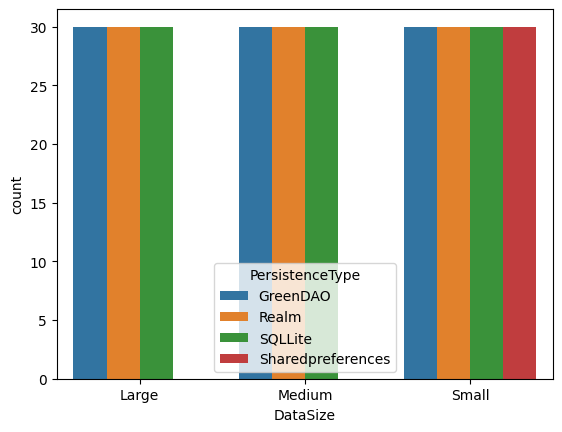

In [64]:
sns.countplot(data=android_persistence, x='DataSize', hue='PersistenceType')


Visualise the variable `Time` with a boxplot, each time with more detail. Do you notice how you get a better view of the data each time you do this?

- First over the entire dataset (parameter `x`)
- Then grouped according to `DataSize` (parameter `y`)
- Finally, split it according to `PersistenceType` (parameter `hue`)

<Axes: xlabel='Time'>

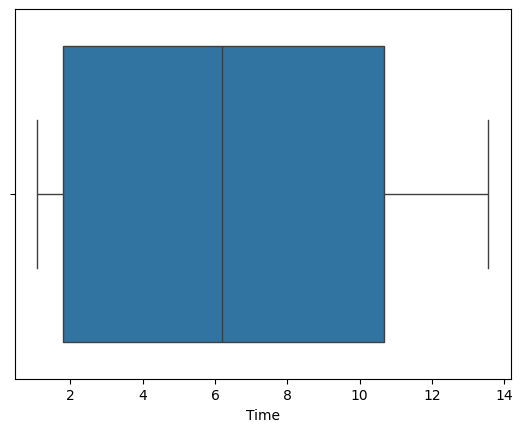

In [65]:
sns.boxplot(x=android_persistence.Time)

<Axes: xlabel='DataSize', ylabel='Time'>

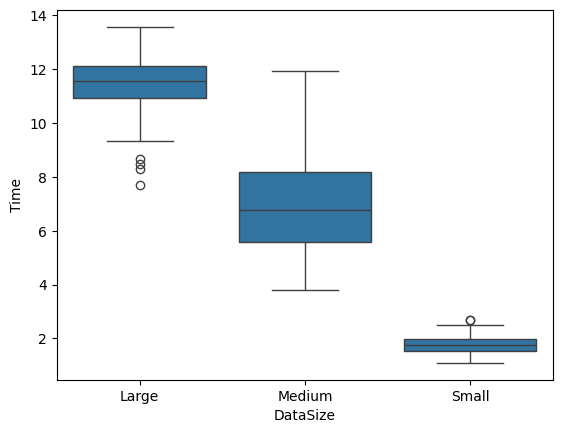

In [66]:
sns.boxplot(x='DataSize', y='Time', data=android_persistence)

<Axes: xlabel='DataSize', ylabel='Time'>

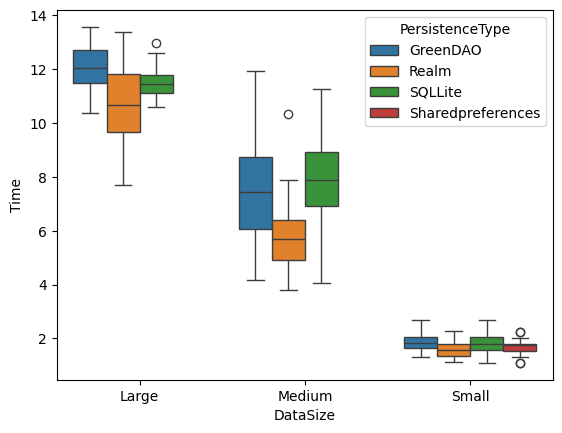

In [67]:
sns.boxplot(x='DataSize', y='Time', hue='PersistenceType', data=android_persistence)

**(Challenge)** Try to do something similar with a density graph: for each value of `DataSize`, show a scatter diagram showing a density graph of the variable `Time` for each value of `PersistenceType` (tip: `sns.FacetGrid()`). The result may look something like this:

![Density graphs for each `DataSize`, comparing the performance of different `PersistenceTypes`](img/persistence-density.png)

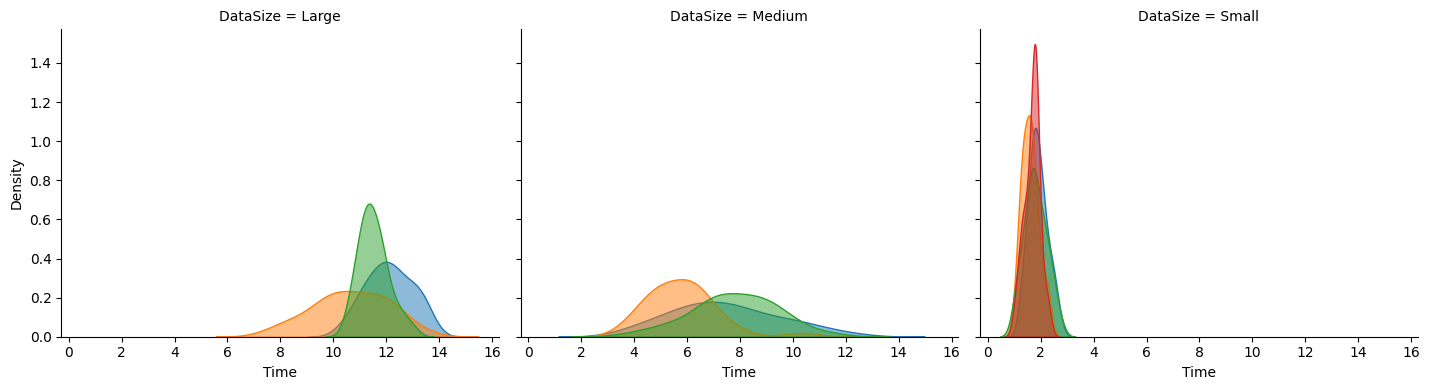

In [72]:
g = sns.FacetGrid(data=android_persistence, col="DataSize", hue="PersistenceType", height=4, aspect=1.2)
g.map(sns.kdeplot, "Time", fill=True, common_norm=False, alpha=0.5)

Calculate sample mean and standard deviation of `Time`.

- Across the whole dataset
- Broken down according to `DataSize`
- Broken down according to `PersistenceType`
- Broken down according to `DataSize` and `PersistenceType`

In [80]:
by_datasize = android_persistence.groupby('DataSize', observed=True)['Time'].agg(['mean', 'std'])
by_persistence = android_persistence.groupby('PersistenceType', observed=True)['Time'].agg(['mean', 'std'])
by_both = android_persistence.groupby(['PersistenceType', 'DataSize'], observed=True)['Time'].agg(['mean', 'std'])
print(by_datasize)
print(by_persistence)
print(by_both)

               mean       std
DataSize                     
Large     11.425667  1.163785
Medium     7.022000  1.864335
Small      1.741333  0.358625
                       mean       std
PersistenceType                      
GreenDAO           7.152667  4.385917
Realm              6.022889  3.884175
SQLLite            7.036000  4.146336
Sharedpreferences  1.673667  0.285192
                                 mean       std
PersistenceType   DataSize                     
GreenDAO          Large     12.110333  0.868461
                  Medium     7.454000  2.007358
                  Small      1.893667  0.347905
Realm             Large     10.651667  1.405990
                  Medium     5.818000  1.330951
                  Small      1.599000  0.314986
SQLLite           Large     11.515000  0.559142
                  Medium     7.794000  1.599007
                  Small      1.799000  0.415960
Sharedpreferences Small      1.673667  0.285192


## Expected results

As a check, you can find the expected results here (max. 3 decimal places):

| Statistic         | Mean   | Standard deviation |
| :---------------- | :----- | :----------------- |
| Whole dataset     | 6.231  | 4.230              |
| Small             | 1.741  | 0.359              |
| Medium            | 7.022  | 1.864              |
| Large             | 11.426 | 1.164              |
| GreenDAO          | 7.152  | 4.386              |
| Realm             | 6.023  | 3.884              |
| SQLite            | 7.036  | 4.146              |
| SharedPreferences | 1.674  | 0.285              |

Split on both criteria:

| Sample mean       | Small | Medium | Large  |
| :---------------- | :---- | :----- | :----- |
| GreenDAO          | 1.894 | 7.454  | 12.110 |
| Realm             | 1.599 | 5.818  | 10.652 |
| SQLite            | 1.799 | 7.794  | 11.515 |
| SharedPreferences | 1.674 | -      | -      |

| Standard deviation | Small | Medium | Large |
| :----------------- | :---- | :----- | :---- |
| GreenDAO           | 0.348 | 2.007  | 0.868 |
| Realm              | 0.315 | 1.331  | 1.406 |
| SQLite             | 0.416 | 1.599  | 0.559 |
| SharedPreferences  | 0.285 | -      | -     |
